In [12]:
from mnist import MNIST
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import exp, clip
# Allowed on piazza
from sklearn.utils import shuffle
from numpy.random import randint
%matplotlib inline

In [4]:
def load_dataset():
    mndata = MNIST('./data/')
    X_train, labels_train = map(np.array, mndata.load_training())
    # The test labels are meaningless,
    # since you're replacing the official MNIST test set with our own test set
    X_test, _ = map(np.array, mndata.load_testing())
    # Remember to center and normalize the data...
    return X_train, labels_train, X_test

X_train, labels_train, X_test = load_dataset()

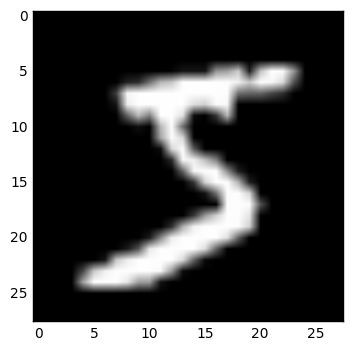

In [5]:
plt.imshow(X_train[0].reshape((28,28)), cmap='Greys_r')

In [157]:
def safe_exp(x):
    """to avoid inf and NaN values"""
    """https://github.com/miha-stopar/nnets/blob/master/neuron/tools.py"""
    return exp(clip(x, -500, 500))
def layerOneActivations(z):
    return np.maximum(z, np.zeros_like(z))
def layerOneDeriv(z):
    return np.where(z > 0, 1,0)
def layerTwoActivations(x): 
    e_x = safe_exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)
def layerTwoDeriv(layerTwoActivation, y):
    return layerTwoActivation - y
def one_hot(labels_train):     
    '''Convert categorical labels 0,1,2,....9 to standard basis vectors in R^{10} '''     
    return np.eye(10)[labels_train]
def computeCost(inputDataset, labels):
    inputDataset = np.hstack((inputDataset, np.ones((inputDataset.shape[0],1))))
    
    hiddenLayerWeightedInput = weights[0].dot(inputVector)
    hiddenLayerActivation = np.append(g[0](hiddenLayerWeightedInput), [1])

    outputLayerWeightedInput = weights[1].dot(hiddenLayerActivation)
    outputLayerActivation = g[1](outputLayerWeightedInput)
    return -(outputLayerActivation * np.log(labels + 1e-200)).sum()
# Param for layer k exists in array position k-1
# i.e. [V,W]
g = [layerOneActivations, layerTwoActivations]
g_prime = [layerOneDeriv, layerTwoDeriv]
weights = [np.zeros((n_hid, n_in+1)), np.zeros((n_out, n_hid+1))]

60000


In [ ]:
n_in = 784
n_hid = 200
n_out = 10
n_layers = 3
compute_cost_interval = 10
train_size = int(.8*len(labels_train))
validate_size = int(.2*len(labels_train))
labels, inputData = shuffle(one_hot(labels_train), X_train)
num_iters = 3000

trainLabels, trainData = labels[train_size:], inputData[train_size:]
validateLabels, validateData = labels[:validate_size], inputData[:validate_size]

# Save costs here
trainingCost, validationCost = np.array([]), np.array([])

# Hyperparameters
initialLearningRate = 5e-2
decayFactor = 0.001
for i in range(num_iters):
    learningRate = initialLearningRate*np.exp(-decayFactor * i)
    
    # Select a random point
    datapointIndex = randint(0, len(trainLabels))
    inputVector = np.append(trainData[datapointIndex], [1])
    labelVector = trainLabels[datapointIndex]

    # Feed forward
    hiddenLayerWeightedInput = weights[0].dot(inputVector)
    hiddenLayerActivation = np.append(g[0](hiddenLayerWeightedInput), [1])

    outputLayerWeightedInput = weights[1].dot(hiddenLayerActivation)
    outputLayerActivation = g[1](outputLayerWeightedInput)

    # Compute cost (don't do every time)
    if i % compute_cost_interval == 0:
        trainingCost = np.append(trainingCost, computeCost(trainData, trainLabels))
        validationCost = np.append(validationCost, computeCost(validateData, validateLabels))

    # Update outer weights
    # W
    deltaW = outputLayerActivation - labelVector
    dW = np.outer(deltaW,hiddenLayerActivation)

    # V
    deltaV = g_prime[0](hiddenLayerWeightedInput)
    dV = deltaV * weights[1].T.dot(deltaW)[:-1]
    
    # Update weights
    # W
    weights[1] -= learningRate*dW
    # V
    weights[0] -= learningRate*dV[None].T
# Normalize costs for comparison
# validationCost /= len(validateLabels)
# trainingCost /= len(trainLabels)

In [ ]:
# Plot the cost over the iterations
plt.plot(validationCost, label="validation cost")
plt.plot(trainingCost, label="training cost")
plt.xlabel('iteration x10')
plt.ylabel('$J$', fontsize=15)
plt.title('Normalized cost over iteration')
plt.grid()
plt.legend()
plt.show()